In [1]:
! pip install "dask[complete]" pandas openpyxl matplotlib seaborn plotly dash psutil


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
# Import necessary libraries
import dask.dataframe as dd
import pandas as pd
import glob
import os
import dask
import matplotlib.pyplot as plt
from dask.distributed import Client, progress
import numpy as np


In [ ]:
# Start a local Dask client
client = Client()
print(f"Dashboard link: {client.dashboard_link}")

Dashboard link: http://127.0.0.1:8787/status


2025-05-30 06:52:00,547 - distributed.scheduler - WARNING - Worker failed to heartbeat for 1026s; attempting restart: <WorkerState 'tcp://127.0.0.1:62104', name: 3, status: running, memory: 0, processing: 0>
2025-05-30 06:52:00,550 - distributed.scheduler - WARNING - Worker failed to heartbeat for 1026s; attempting restart: <WorkerState 'tcp://127.0.0.1:62105', name: 1, status: running, memory: 0, processing: 0>
2025-05-30 06:52:00,551 - distributed.scheduler - WARNING - Worker failed to heartbeat for 1026s; attempting restart: <WorkerState 'tcp://127.0.0.1:62110', name: 2, status: running, memory: 0, processing: 0>
2025-05-30 06:52:01,550 - distributed.nanny - WARNING - Restarting worker
2025-05-30 06:52:01,566 - distributed.nanny - WARNING - Restarting worker
2025-05-30 06:52:01,572 - distributed.nanny - WARNING - Restarting worker
2025-05-30 07:07:04,686 - distributed.shuffle._scheduler_plugin - WARNING - Shuffle 3edf276cf2ef48c7b86b91978ee531f3 initialized by task ('shuffle-transfe

In [3]:
res_path = "../resources"
excel_files = glob.glob(os.path.join(res_path, "*.xlsx"))
print(f"Found {len(excel_files)} files to process")

Found 7 files to process


In [5]:

def common_elements(list1, list2):
    return list(set(list1) & set(list2))

common_columns = None
all_column_types = {}

print("\n--- COLUMN ANALYSIS ---")
for file in excel_files:
    try:
        print(f"File: {file}")
        df = pd.read_excel(file)
        
        df.columns = [col.strip().lower().replace(" ", "_") for col in df.columns]
        
        print("Columns and datatypes:")
        for col, dtype in df.dtypes.items():
            print(f"  - {col}: {dtype}")
        
        for col in df.columns:
            if col not in all_column_types:
                all_column_types[col] = []
            all_column_types[col].append(str(df[col].dtype))
        
        if common_columns is None:
            common_columns = df.columns.tolist()
        else:
            common_columns = common_elements(common_columns, df.columns)
    except Exception as e:
        print(f"Error while processing {file}: {e}")


--- COLUMN ANALYSIS ---
File: ../resources\liczba_uczniów_zawody_szkolnictwa_zawodowego_klasy_młodociani_prac_rok_szkolny_20242025_absolwenci_20232024.xlsx
Columns and datatypes:
  - rok_szkolny: object
  - idterytgmina: int64
  - idterytwojewodztwo: int64
  - wojewodztwo: object
  - powiat: object
  - gmina: object
  - typ_obszaru: object
  - miejscowość: object
  - rspo: int64
  - idtyppodmiotu: int64
  - typ_podmiotu: object
  - idrodzajplacowki: int64
  - rodzaj_szkoły/placówki: object
  - idkategoriauczniow: int64
  - kategoria_uczniów: object
  - idpublicznosc: int64
  - publiczność: object
  - idspecyfikaszkoly: int64
  - specyfika_szkoły: object
  - idtyporgprow: int64
  - typ_organu_prowadzącego: object
  - organ_prowadzący: object
  - nazwa_placówki: object
  - ulica: object
  - numer_domu: object
  - kod_pocztowy: object
  - poczta: object
  - numer_telefonu: object
  - numer_faksu: float64
  - adres_email: object
  - adres_www: object
  - regon: int64
  - idzawod: int64
  

In [6]:
import pandas as pd
import numpy as np
import glob
import os

def normalize_column_name(col_name):
    """Normalizuje nazwy kolumn do jednolitego formatu"""
    return col_name.strip().lower().replace(" ", "_").replace("/", "_")

def extract_year_from_filename(filename):
    """Wyciąga rok szkolny z nazwy pliku"""
    if "20222023" in filename:
        return "2022/2023"
    elif "20232024" in filename:
        return "2023/2024" 
    elif "20242025" in filename:
        return "2024/2025"
    elif "20212022" in filename:
        return "2021/2022"
    elif "20202021" in filename:
        return "2020/2021"
    elif "20192020" in filename:
        return "2019/2020"
    else:
        return "Unknown"


In [5]:
target_files = [f for f in excel_files if any(year in f for year in ["20222023", "20232024", "20242025"])]
print(f"Target files for 2022-2024: {len(target_files)}")
for f in target_files:
    print(f"  - {os.path.basename(f)}")

Target files for 2022-2024: 3
  - liczba_uczniów_zawody_szkolnictwa_zawodowego_klasy_młodociani_prac_rok_szkolny_20242025_absolwenci_20232024.xlsx
  - liczba_uczniów_zawody_szkolnictwa_zawodowego_klasy_rok_szkolny_20222023.xlsx
  - liczba_uczniów_zawody_szkolnictwa_zawodowego_klasy_rok_szkolny_20232024_absolwenci_20222023_OHW9KDz.xlsx


In [14]:
all_columns = [
'rok_szkolny', 'idterytgmina', 'idterytwojewodztwo', 'wojewodztwo',
'powiat', 'gmina', 'typ_obszaru', 'miejscowość', 'rspo',
'idtyppodmiotu', 'typ_podmiotu', 'idrodzajplacowki',
'rodzaj_szkoły_placówki', 'idkategoriauczniow', 'kategoria_uczniów',
'idpublicznosc', 'publiczność', 'idspecyfikaszkoly', 'specyfika_szkoły',
'idtyporgprow', 'typ_organu_prowadzącego', 'organ_prowadzący',
'nazwa_placówki', 'ulica', 'numer_domu', 'kod_pocztowy', 'poczta',
'numer_telefonu', 'adres_email', 'adres_www', 'regon',
'idzawod', 'zawód', 'idklasa', 'klasa', 'liczba_uczniów',
'w_tym_dziewczęta', 'liczba_młodocianych_pracowników',
'w_tym_dziewczęta_młod_prac', 'liczba_absolwentów', 'w_tym_dziewczęta_abs'
]
print(f"Total expected columns: {len(all_columns)}")

Total expected columns: 41


In [15]:
def process_excel_file_unified(filename, target_columns):
    """
    Przetwarza plik Excel i ujednolica kolumny
    """
    try:
        year = extract_year_from_filename(filename)
        print(f"Processing file: {os.path.basename(filename)}, year: {year}")
        # Wczytaj plik Excel
        df = pd.read_excel(filename)
        
        # Normalizuj nazwy kolumn
        df.columns = [normalize_column_name(col) for col in df.columns]
        
        # Dodaj rok szkolny jeśli go nie ma
        if 'rok_szkolny' not in df.columns:
            df['rok_szkolny'] = year
        
        # Napraw nazwę kolumny rodzaj_szkoły/placówki
        if 'rodzaj_szkoły_placówki' in df.columns:
            pass  # już jest poprawna
        elif 'rodzaj_szkoły/placówki' in df.columns:
            df['rodzaj_szkoły_placówki'] = df['rodzaj_szkoły/placówki']
            df = df.drop('rodzaj_szkoły/placówki', axis=1)
        
        # Utwórz DataFrame z wszystkimi docelowymi kolumnami
        unified_df = pd.DataFrame()
        
        # Skopiuj istniejące kolumny
        for col in target_columns:
            if col in df.columns:
                unified_df[col] = df[col]
            else:
                # Dodaj brakujące kolumny jako NaN
                unified_df[col] = np.nan
        
        # Konwertuj typy danych numerycznych
        numeric_columns = ['liczba_uczniów', 'w_tym_dziewczęta', 
                        'liczba_młodocianych_pracowników', 'w_tym_dziewczęta_młod_prac',
                        'liczba_absolwentów', 'w_tym_dziewczęta_abs']
        
        for col in numeric_columns:
            if col in unified_df.columns:
                unified_df[col] = pd.to_numeric(unified_df[col], errors='coerce')
        
        print(f"  - Processed {len(unified_df)} rows with {len(unified_df.columns)} columns")
        return unified_df
        
    except Exception as e:
        print(f"Error processing {filename}: {e}")
        # Zwróć pusty DataFrame z docelowymi kolumnami
        return pd.DataFrame(columns=target_columns)

In [16]:
delayed_dfs = [dask.delayed(process_excel_file_unified)(file, all_columns) for file in target_files]

In [ ]:
print("Creating unified Dask DataFrame...")
unified_dask_df = dd.from_delayed(delayed_dfs)
print(f"Unified DataFrame shape: {unified_dask_df.shape}")
print(f"Columns: {list(unified_dask_df.columns)}")

Creating unified Dask DataFrame...
Unified DataFrame shape: (<dask_expr.expr.Scalar: expr=ArrowStringConversion(frame=FromDelayed(dea7d76)).size() // 41, dtype=int64>, 41)
Columns: ['rok_szkolny', 'idterytgmina', 'idterytwojewodztwo', 'wojewodztwo', 'powiat', 'gmina', 'typ_obszaru', 'miejscowość', 'rspo', 'idtyppodmiotu', 'typ_podmiotu', 'idrodzajplacowki', 'rodzaj_szkoły_placówki', 'idkategoriauczniow', 'kategoria_uczniów', 'idpublicznosc', 'publiczność', 'idspecyfikaszkoly', 'specyfika_szkoły', 'idtyporgprow', 'typ_organu_prowadzącego', 'organ_prowadzący', 'nazwa_placówki', 'ulica', 'numer_domu', 'kod_pocztowy', 'poczta', 'numer_telefonu', 'adres_email', 'adres_www', 'regon', 'idzawod', 'zawód', 'idklasa', 'klasa', 'liczba_uczniów', 'w_tym_dziewczęta', 'liczba_młodocianych_pracowników', 'w_tym_dziewczęta_młod_prac', 'liczba_absolwentów', 'w_tym_dziewczęta_abs']


In [ ]:
print("\n=== KEY-VALUE ANALYSIS ===")
###Sprawdź dostępne lata
available_years = unified_dask_df['rok_szkolny'].unique().compute()
print(f"Available years: {sorted(available_years)}")



=== KEY-VALUE ANALYSIS ===
Available years: ['2022/2023', '2023/2024', '2024/2025']


In [20]:

###Oblicz liczby chłopców (liczba_uczniów - w_tym_dziewczęta)
unified_dask_df = unified_dask_df.assign(
liczba_chlopcow=unified_dask_df['liczba_uczniów'] - unified_dask_df['w_tym_dziewczęta'].fillna(0)
)
print("\n1. (Województwo, Zawód) -> {liczbaUczniów, liczbaChłopców, liczbaDziewcząt}")
print("="*80)
wojewodztwo_zawod = (unified_dask_df.groupby(['wojewodztwo', 'zawód'])
.agg({
'liczba_uczniów': 'sum',
'liczba_chlopcow': 'sum',
'w_tym_dziewczęta': 'sum'
})
.compute()
.fillna(0))



1. (Województwo, Zawód) -> {liczbaUczniów, liczbaChłopców, liczbaDziewcząt}


In [21]:

###Top 5 kombinacji według liczby uczniów
top_5_woj_zawod = wojewodztwo_zawod.sort_values('liczba_uczniów', ascending=False).head(5)
print("TOP 5:")
for idx, row in top_5_woj_zawod.iterrows():
    woj, zawod = idx
    print(f"({woj}, {zawod}) -> {{uczniów: {int(row['liczba_uczniów'])}, chłopców: {int(row['liczba_chlopcow'])}, dziewcząt: {int(row['w_tym_dziewczęta'])}}}")


TOP 5:
(MAZOWIECKIE, Technik informatyk) -> {uczniów: 36733, chłopców: 35342, dziewcząt: 1391}
(ŚLĄSKIE, Technik informatyk) -> {uczniów: 35933, chłopców: 34621, dziewcząt: 1312}
(MAŁOPOLSKIE, Przygotowanie do kształcenia zawodowego) -> {uczniów: 32282, chłopców: 18416, dziewcząt: 13866}
(WIELKOPOLSKIE, Technik informatyk) -> {uczniów: 29032, chłopców: 27816, dziewcząt: 1216}
(MAŁOPOLSKIE, Technik informatyk) -> {uczniów: 28984, chłopców: 27943, dziewcząt: 1041}


In [26]:

###Bottom 5 kombinacji według liczby uczniów (ale większe niż 0)
bottom_5_woj_zawod = wojewodztwo_zawod[wojewodztwo_zawod['liczba_uczniów'] > 0].sort_values('liczba_uczniów', ascending=True).head(5)
print("\nBOTTOM 5:")
for idx, row in bottom_5_woj_zawod.iterrows():
    woj, zawod = idx
    
    print(f"({woj}, {zawod}) -> {{uczniów: {int(row['liczba_uczniów'])}, chłopców: {int(row['liczba_chlopcow'])}, dziewcząt: {int(row['w_tym_dziewczęta'])}}}")



BOTTOM 5:
(WARMIŃSKO-MAZURSKIE, Optyk-mechanik) -> {uczniów: 1, chłopców: 1, dziewcząt: 0}
(OPOLSKIE, Drukarz fleksograficzny) -> {uczniów: 1, chłopców: 1, dziewcząt: 0}
(DOLNOŚLĄSKIE, Górnik odkrywkowej eksploatacji złóż) -> {uczniów: 1, chłopców: 1, dziewcząt: 0}
(DOLNOŚLĄSKIE, Cieśla) -> {uczniów: 1, chłopców: 1, dziewcząt: 0}
(MAZOWIECKIE, Mechanik precyzyjny) -> {uczniów: 1, chłopców: 1, dziewcząt: 0}


In [27]:

print("\n" + "="*80)
print("(2. Typ obszaru, Zawód) -> {liczbaUczniów, liczbaChłopców, liczbaDziewcząt}")
print("="*80)
obszar_zawod = (unified_dask_df.groupby(['typ_obszaru', 'zawód'])
.agg({
'liczba_uczniów': 'sum',
'liczba_chlopcow': 'sum',
'w_tym_dziewczęta': 'sum'
})
.compute()
.fillna(0))



(2. Typ obszaru, Zawód) -> {liczbaUczniów, liczbaChłopców, liczbaDziewcząt}


In [29]:

#Top 5
top_5_obszar_zawod = obszar_zawod.sort_values('liczba_uczniów', ascending=False).head(5)
print("TOP 5:")
for idx, row in top_5_obszar_zawod.iterrows():
    obszar, zawod = idx
    print(f"({obszar}, {zawod}) -> {{uczniów: {int(row['liczba_uczniów'])}, chłopców: {int(row['liczba_chlopcow'])}, dziewcząt: {int(row['w_tym_dziewczęta'])}}}")


TOP 5:
(obszar miejski, Technik informatyk) -> {uczniów: 294457, chłopców: 282113, dziewcząt: 12344}
(obszar miejski, Technik logistyk) -> {uczniów: 193538, chłopców: 144332, dziewcząt: 49206}
(obszar miejski, Przygotowanie do kształcenia zawodowego) -> {uczniów: 180482, chłopców: 103030, dziewcząt: 77452}
(obszar miejski, Technik żywienia i usług gastronomicznych) -> {uczniów: 138385, chłopców: 73990, dziewcząt: 64395}
(obszar miejski, Technik ekonomista) -> {uczniów: 115318, chłopców: 65770, dziewcząt: 49548}


In [30]:


#Bottom 5
bottom_5_obszar_zawod = obszar_zawod[obszar_zawod['liczba_uczniów'] > 0].sort_values('liczba_uczniów', ascending=True).head(5)
print("\nBOTTOM 5:")
for idx, row in bottom_5_obszar_zawod.iterrows():
    obszar, zawod = idx
    print(f"({obszar}, {zawod}) -> {{uczniów: {int(row['liczba_uczniów'])}, chłopców: {int(row['liczba_chlopcow'])}, dziewcząt: {int(row['w_tym_dziewczęta'])}}}")



BOTTOM 5:
(obszar miejski, Operator urządzeń przemysłu ceramicznego) -> {uczniów: 1, chłopców: 1, dziewcząt: 0}
(obszar miejski, Górnik odkrywkowej eksploatacji złóż) -> {uczniów: 1, chłopców: 1, dziewcząt: 0}
(obszar wiejski, Monter sieci i urządzeń telekomunikacyjnych ) -> {uczniów: 2, chłopców: 2, dziewcząt: 0}
(obszar wiejski, Technik inżynierii sanitarnej) -> {uczniów: 2, chłopców: 2, dziewcząt: 0}
(obszar miejski, Operator maszyn w przemyśle włókienniczym ) -> {uczniów: 2, chłopców: 2, dziewcząt: 0}


In [31]:

print("\n" + "="*80)
print("3. Województwo -> {liczbaSzkół}")
print("="*80)
wojewodztwo_szkoly = (unified_dask_df.groupby('wojewodztwo')['nazwa_placówki']
.nunique()
.compute()
.sort_values(ascending=False))



3. Województwo -> {liczbaSzkół}


In [32]:

print("TOP 5 województw z największą liczbą szkół:")
for woj, liczba in wojewodztwo_szkoly.head(5).items():
    print(f"{woj} -> {{szkół: {liczba}}}")


TOP 5 województw z największą liczbą szkół:
MAZOWIECKIE -> {szkół: 676}
ŚLĄSKIE -> {szkół: 630}
WIELKOPOLSKIE -> {szkół: 525}
MAŁOPOLSKIE -> {szkół: 516}
DOLNOŚLĄSKIE -> {szkół: 429}


In [33]:

print("\nBOTTOM 5 województw z najmniejszą liczbą szkół:")
for woj, liczba in wojewodztwo_szkoly.tail(5).items():
    print(f"{woj} -> {{szkół: {liczba}}}")



BOTTOM 5 województw z najmniejszą liczbą szkół:
WARMIŃSKO-MAZURSKIE -> {szkół: 234}
ŚWIĘTOKRZYSKIE -> {szkół: 223}
PODLASKIE -> {szkół: 190}
OPOLSKIE -> {szkół: 168}
LUBUSKIE -> {szkół: 158}


In [34]:

print("\n" + "="*80)
print("4. (Województwo, Typ szkoły) -> {liczbaSzkół}")
print("="*80)
wojewodztwo_typ_szkoly = (unified_dask_df.groupby(['wojewodztwo', 'rodzaj_szkoły_placówki'])['nazwa_placówki']
.nunique()
.compute()
.sort_values(ascending=False))



4. (Województwo, Typ szkoły) -> {liczbaSzkół}


In [35]:

print("TOP 5:")
for idx, liczba in wojewodztwo_typ_szkoly.head(5).items():
    woj, typ = idx
    print(f"({woj}, {typ}) -> {{szkół: {liczba}}}")


TOP 5:
(ŚLĄSKIE, szkoła/placówka wchodząca w skład jednostki złożonej) -> {szkół: 433}
(MAZOWIECKIE, szkoła/placówka wchodząca w skład jednostki złożonej) -> {szkół: 425}
(WIELKOPOLSKIE, szkoła/placówka wchodząca w skład jednostki złożonej) -> {szkół: 354}
(MAŁOPOLSKIE, szkoła/placówka wchodząca w skład jednostki złożonej) -> {szkół: 336}
(DOLNOŚLĄSKIE, szkoła/placówka wchodząca w skład jednostki złożonej) -> {szkół: 292}


In [36]:

print("\nBOTTOM 5:")
for idx, liczba in wojewodztwo_typ_szkoly.tail(5).items():
    woj, typ = idx
    print(f"({woj}, {typ}) -> {{szkół: {liczba}}}")



BOTTOM 5:
(OPOLSKIE, filia szkoły lub placówki) -> {szkół: 1}
(DOLNOŚLĄSKIE, filia szkoły lub placówki) -> {szkół: 1}
(KUJAWSKO-POMORSKIE, filia szkoły lub placówki) -> {szkół: 1}
(ŁÓDZKIE, filia szkoły lub placówki) -> {szkół: 1}
(MAZOWIECKIE, filia szkoły lub placówki) -> {szkół: 1}


In [37]:

print("\n" + "="*80)
print("5. (Województwo, Publiczność) -> {liczbaSzkół}")
print("="*80)
wojewodztwo_publicznosc = (unified_dask_df.groupby(['wojewodztwo', 'publiczność'])['nazwa_placówki']
.nunique()
.compute()
.sort_values(ascending=False))



5. (Województwo, Publiczność) -> {liczbaSzkół}


In [38]:

print("TOP 5:")
for idx, liczba in wojewodztwo_publicznosc.head(5).items():
    woj, pub = idx
    print(f"({woj}, {pub}) -> {{szkół: {liczba}}}")


TOP 5:
(MAZOWIECKIE, publiczna) -> {szkół: 453}
(ŚLĄSKIE, publiczna) -> {szkół: 439}
(WIELKOPOLSKIE, publiczna) -> {szkół: 373}
(MAŁOPOLSKIE, publiczna) -> {szkół: 362}
(DOLNOŚLĄSKIE, publiczna) -> {szkół: 306}


In [39]:

print("\nBOTTOM 5:")
for idx, liczba in wojewodztwo_publicznosc.tail(5).items():
    woj, pub = idx
    print(f"({woj}, {pub}) -> {{szkół: {liczba}}}")



BOTTOM 5:
(ŁÓDZKIE, niepubliczna szkoła artystyczna bez uprawnień publicznej szkoły artystycznej) -> {szkół: 1}
(PODKARPACKIE, niepubliczna szkoła artystyczna bez uprawnień publicznej szkoły artystycznej) -> {szkół: 1}
(PODLASKIE, niepubliczna szkoła artystyczna o uprawnieniach publicznej szkoły artystycznej) -> {szkół: 1}
(OPOLSKIE, niepubliczna szkoła artystyczna bez uprawnień publicznej szkoły artystycznej) -> {szkół: 1}
(OPOLSKIE, niepubliczna szkoła artystyczna o uprawnieniach publicznej szkoły artystycznej) -> {szkół: 1}


In [40]:

print("\n" + "="*80)
print("6. (Województwo) -> {liczbaUczniów}")
print("="*80)
wojewodztwo_uczniowie = (unified_dask_df.groupby('wojewodztwo')['liczba_uczniów']
.sum()
.compute()
.sort_values(ascending=False))



6. (Województwo) -> {liczbaUczniów}


In [41]:

print("TOP 5 województw z największą liczbą uczniów:")
for woj, liczba in wojewodztwo_uczniowie.head(5).items():
    print(f"{woj} -> {{uczniów: {int(liczba)}}}")


TOP 5 województw z największą liczbą uczniów:
MAZOWIECKIE -> {uczniów: 484664}
ŚLĄSKIE -> {uczniów: 433014}
WIELKOPOLSKIE -> {uczniów: 400335}
MAŁOPOLSKIE -> {uczniów: 355950}
DOLNOŚLĄSKIE -> {uczniów: 283343}


In [42]:

print("\nBOTTOM 5 województw z najmniejszą liczbą uczniów:")
for woj, liczba in wojewodztwo_uczniowie.tail(5).items():
    print(f"{woj} -> {{uczniów: {int(liczba)}}}")



BOTTOM 5 województw z najmniejszą liczbą uczniów:
WARMIŃSKO-MAZURSKIE -> {uczniów: 136434}
ŚWIĘTOKRZYSKIE -> {uczniów: 127374}
LUBUSKIE -> {uczniów: 116430}
PODLASKIE -> {uczniów: 108657}
OPOLSKIE -> {uczniów: 99108}


In [46]:

print("\n" + "="*80)
print("7. (Rok, Zawód) -> {liczbaUczniów} - najpopularniejszy zawód w danym roku")
print("="*80)
for year in sorted(available_years):
    year_data = unified_dask_df[unified_dask_df['rok_szkolny'] == year]
    top_zawod_rok = (year_data.groupby('zawód')['liczba_uczniów']
    .sum()
    .compute()
    .sort_values(ascending=False))

    print(f"\nRok {year}:")
    print("TOP 5 zawodów:")
    for zawod, liczba in top_zawod_rok.head(5).items():
        print(f"  ({year}, {zawod}) -> {{uczniów: {int(liczba)}}}")
        
    
    print("BOTTOM 5 zawodów (z liczbą > 0):")
    bottom_zawody = top_zawod_rok[top_zawod_rok > 0].tail(5)
    for zawod, liczba in bottom_zawody.items():
        print(f"  ({year}, {zawod}) -> {{uczniów: {int(liczba)}}}")

        
    




7. (Rok, Zawód) -> {liczbaUczniów} - najpopularniejszy zawód w danym roku

Rok 2022/2023:
TOP 5 zawodów:
  (2022/2023, Technik informatyk) -> {uczniów: 106494}
  (2022/2023, Technik logistyk) -> {uczniów: 64731}
  (2022/2023, Przygotowanie do kształcenia zawodowego) -> {uczniów: 63603}
  (2022/2023, Technik żywienia i usług gastronomicznych) -> {uczniów: 54156}
  (2022/2023, Technik ekonomista) -> {uczniów: 41257}
BOTTOM 5 zawodów (z liczbą > 0):
  (2022/2023, Technik włókienniczych wyrobów dekoracyjnych) -> {uczniów: 2}
  (2022/2023, Górnik odkrywkowej eksploatacji złóż) -> {uczniów: 1}
  (2022/2023, Optyk-mechanik) -> {uczniów: 1}
  (2022/2023, Operator urządzeń przemysłu ceramicznego) -> {uczniów: 1}
  (2022/2023, Operator maszyn w przemyśle włókienniczym ) -> {uczniów: 1}

Rok 2023/2024:
TOP 5 zawodów:
  (2023/2024, Technik informatyk) -> {uczniów: 105940}
  (2023/2024, Technik logistyk) -> {uczniów: 70428}
  (2023/2024, Przygotowanie do kształcenia zawodowego) -> {uczniów: 65659}

In [47]:

print("\n" + "="*80)
print("8. DODATKOWE ANALIZY - Analiza płci w zawodach")
print("="*80)
#Zawody z największą przewagą dziewcząt
zawod_plec = (unified_dask_df.groupby('zawód')
.agg({
'liczba_uczniów': 'sum',
'w_tym_dziewczęta': 'sum'
})
.compute()
.fillna(0))



8. DODATKOWE ANALIZY - Analiza płci w zawodach


In [48]:

zawod_plec = zawod_plec[zawod_plec['liczba_uczniów'] > 0]
zawod_plec['procent_dziewczat'] = (zawod_plec['w_tym_dziewczęta'] / zawod_plec['liczba_uczniów']) * 100
zawod_plec['liczba_chlopcow'] = zawod_plec['liczba_uczniów'] - zawod_plec['w_tym_dziewczęta']


In [49]:

print("TOP 5 zawodów z największym odsetkiem dziewcząt:")
top_dziewczeta = zawod_plec.sort_values('procent_dziewczat', ascending=False).head(5)
for zawod, row in top_dziewczeta.iterrows():
    print(f"{zawod} -> {{dziewcząt: {row['procent_dziewczat']:.1f}%, uczniów: {int(row['liczba_uczniów'])}}}")


TOP 5 zawodów z największym odsetkiem dziewcząt:
Eksperymentalny - Animator czytelnictwa -> {dziewcząt: 100.0%, uczniów: 7}
Eksperymentalny - Animator tańca -> {dziewcząt: 87.7%, uczniów: 57}
Eksperymentalny - Animator kultury regionalnej -> {dziewcząt: 85.0%, uczniów: 20}
Eksperymentalny - Technik projektant tekstyliów -> {dziewcząt: 81.2%, uczniów: 48}
Eksperymentalny - Animator działań teatralnych -> {dziewcząt: 78.7%, uczniów: 47}


In [50]:

print("\nTOP 5 zawodów z największym odsetkiem chłopców:")
top_chlopcy = zawod_plec.sort_values('procent_dziewczat', ascending=True).head(5)
for zawod, row in top_chlopcy.iterrows():
    procent_chlopcow = 100 - row['procent_dziewczat']
    print(f"{zawod} -> {{chłopców: {procent_chlopcow:.1f}%, uczniów: {int(row['liczba_uczniów'])}}}")
    



TOP 5 zawodów z największym odsetkiem chłopców:
Operator maszyn i urządzeń przeróbczych -> {chłopców: 100.0%, uczniów: 79}
Betoniarz-zbrojarz -> {chłopców: 100.0%, uczniów: 114}
Monter sieci i urządzeń telekomunikacyjnych  -> {chłopców: 100.0%, uczniów: 30}
Operator urządzeń przemysłu chemicznego -> {chłopców: 100.0%, uczniów: 18}
Kamieniarz -> {chłopców: 100.0%, uczniów: 144}


In [51]:
print("\n=== TOP PROFESSIONS ANALYSIS ===")
#Top 10 zawodów (łącznie dla wszystkich lat)
top_professions = (unified_dask_df.groupby('zawód')['liczba_uczniów']
.sum()
.compute()
.sort_values(ascending=False)
.head(10))
print("Top 10 professions (all years combined):")
print(top_professions)



=== TOP PROFESSIONS ANALYSIS ===
Top 10 professions (all years combined):
zawód
Technik informatyk                           304803.0
Technik logistyk                             201730.0
Przygotowanie do kształcenia zawodowego      197373.0
Technik żywienia i usług gastronomicznych    160169.0
Technik ekonomista                           118754.0
Mechanik pojazdów samochodowych              111069.0
Technik pojazdów samochodowych                98802.0
Kucharz                                       90335.0
Technik usług kosmetycznych                   88804.0
Technik hotelarstwa                           87539.0
Name: liczba_uczniów, dtype: float64


In [52]:

print("\n=== REGIONAL ANALYSIS ===")
#Uczniowie według województw
students_by_region = (unified_dask_df.groupby('wojewodztwo')['liczba_uczniów']
.sum()
.compute()
.sort_values(ascending=False))
print("Students by region:")
print(students_by_region)



=== REGIONAL ANALYSIS ===
Students by region:
wojewodztwo
MAZOWIECKIE            484664.0
ŚLĄSKIE                433014.0
WIELKOPOLSKIE          400335.0
MAŁOPOLSKIE            355950.0
DOLNOŚLĄSKIE           283343.0
POMORSKIE              254080.0
ŁÓDZKIE                227413.0
KUJAWSKO-POMORSKIE     224368.0
PODKARPACKIE           211090.0
LUBELSKIE              191583.0
ZACHODNIOPOMORSKIE     156514.0
WARMIŃSKO-MAZURSKIE    136434.0
ŚWIĘTOKRZYSKIE         127374.0
LUBUSKIE               116430.0
PODLASKIE              108657.0
OPOLSKIE                99108.0
Name: liczba_uczniów, dtype: float64


In [54]:

print("\n=== SPECIAL DATA AVAILABILITY ===")
special_columns = ['w_tym_dziewczęta', 'liczba_młodocianych_pracowników',
'w_tym_dziewczęta_młod_prac', 'liczba_absolwentów',
'w_tym_dziewczęta_abs']
#Sprawdź dostępność danych dla każdego roku
for year in sorted(available_years):
    print(f"\nYear {year}:")
    year_data = unified_dask_df[unified_dask_df['rok_szkolny'] == year]
    total_records = len(year_data.compute())
    for col in special_columns:
        if col in unified_dask_df.columns:
            non_null_count = year_data[col].count().compute()
            percentage = (non_null_count / total_records) * 100 if total_records > 0 else 0
            print(f"  {col}: {non_null_count}/{total_records} ({percentage:.1f}%)")
            



=== SPECIAL DATA AVAILABILITY ===

Year 2022/2023:
  w_tym_dziewczęta: 0/86084 (0.0%)
  liczba_młodocianych_pracowników: 0/86084 (0.0%)
  w_tym_dziewczęta_młod_prac: 0/86084 (0.0%)
  liczba_absolwentów: 18672/86084 (21.7%)
  w_tym_dziewczęta_abs: 11962/86084 (13.9%)

Year 2023/2024:
  w_tym_dziewczęta: 51084/94982 (53.8%)
  liczba_młodocianych_pracowników: 0/94982 (0.0%)
  w_tym_dziewczęta_młod_prac: 0/94982 (0.0%)
  liczba_absolwentów: 19249/94982 (20.3%)
  w_tym_dziewczęta_abs: 12276/94982 (12.9%)

Year 2024/2025:
  w_tym_dziewczęta: 50606/74688 (67.8%)
  liczba_młodocianych_pracowników: 21443/74688 (28.7%)
  w_tym_dziewczęta_młod_prac: 8430/74688 (11.3%)
  liczba_absolwentów: 0/74688 (0.0%)
  w_tym_dziewczęta_abs: 0/74688 (0.0%)


In [55]:
print("\n=== PROFESSION TRENDS OVER TIME ===")
#Trendy dla top 5 zawodów
prof_trends = (unified_dask_df.groupby(['rok_szkolny', 'zawód'])['liczba_uczniów']
.sum()
.compute()
.reset_index())



=== PROFESSION TRENDS OVER TIME ===


In [56]:

#Znajdź top 5 zawodów ogółem
top_5_profs = top_professions.head(5).index.tolist()
#Filtruj trendy dla top 5 zawodów
top_5_trends = prof_trends[prof_trends['zawód'].isin(top_5_profs)]
print("Trends for top 5 professions:")
pivot_trends = top_5_trends.pivot(index='rok_szkolny', columns='zawód', values='liczba_uczniów')
print(pivot_trends)


Trends for top 5 professions:
zawód        Przygotowanie do kształcenia zawodowego  Technik ekonomista  \
rok_szkolny                                                                
2022/2023                                    63603.0             41257.0   
2023/2024                                    65659.0             41207.0   
2024/2025                                    68111.0             36290.0   

zawód        Technik informatyk  Technik logistyk  \
rok_szkolny                                         
2022/2023              106494.0           64731.0   
2023/2024              105940.0           70428.0   
2024/2025               92369.0           66571.0   

zawód        Technik żywienia i usług gastronomicznych  
rok_szkolny                                             
2022/2023                                      54156.0  
2023/2024                                      56140.0  
2024/2025                                      49873.0  


In [59]:

plt.figure(figsize=(15, 10))


<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

Text(0.5, 0, 'Liczba uczniów')

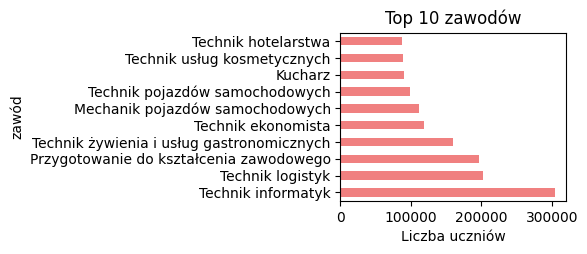

In [60]:

# #Subplot 1: Students by year
# plt.subplot(2, 2, 1)
# students_by_year.plot(kind='bar', color='skyblue')
# plt.title('Liczba uczniów według lat')
# plt.xlabel('Rok szkolny')
# plt.ylabel('Liczba uczniów')
# plt.xticks(rotation=45)
#Subplot 2: Top professions
plt.subplot(2, 2, 2)
top_professions.plot(kind='barh', color='lightcoral')
plt.title('Top 10 zawodów')
plt.xlabel('Liczba uczniów')


Text(0, 0.5, 'Liczba uczniów')

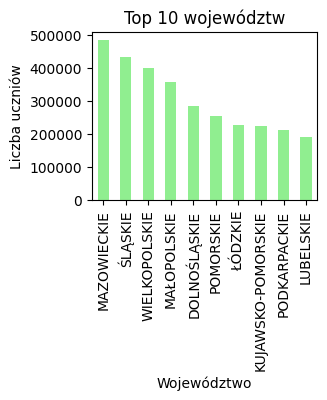

In [62]:

#Subplot 3: Top regions
plt.subplot(2, 2, 3)
students_by_region.head(10).plot(kind='bar', color='lightgreen')
plt.title('Top 10 województw')
plt.xlabel('Województwo')
plt.ylabel('Liczba uczniów')


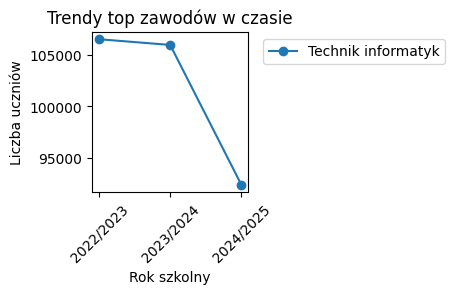

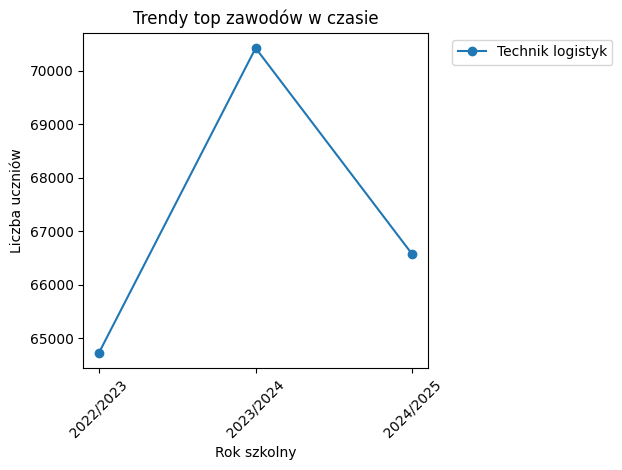

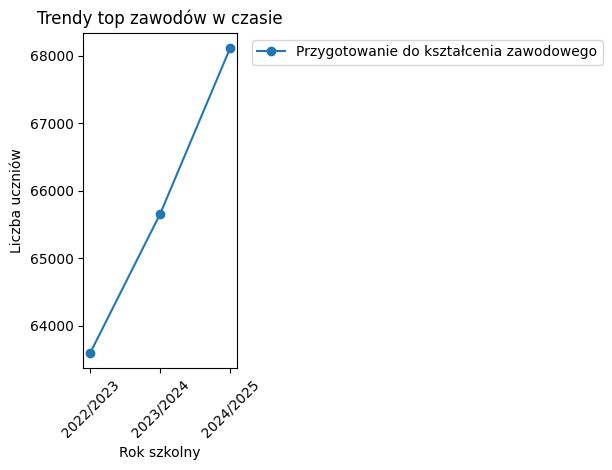

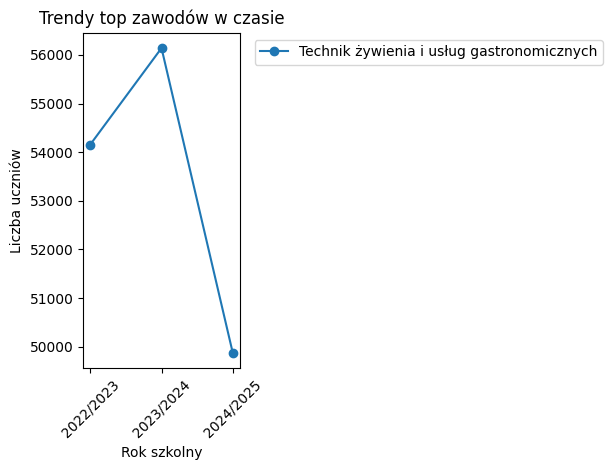

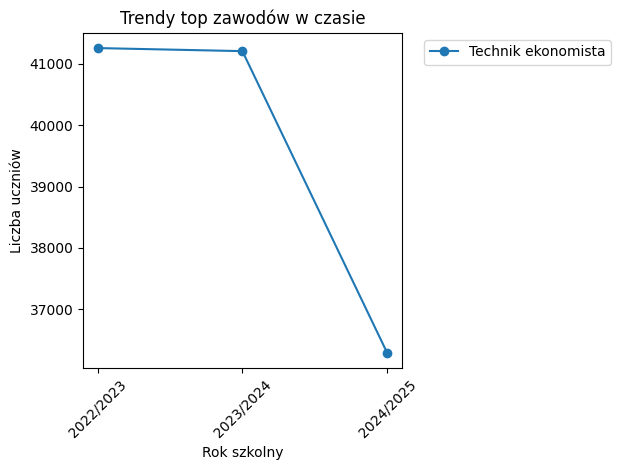

In [64]:

#Subplot 4: Profession trends
plt.subplot(2, 2, 4)
for profession in top_5_profs:  # Show only top 3 for clarity
    prof_data = pivot_trends[profession].dropna()
    plt.plot(prof_data.index, prof_data.values, marker='o', label=profession)
    plt.title('Trendy top zawodów w czasie')
    plt.xlabel('Rok szkolny')
    plt.ylabel('Liczba uczniów')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('education_analysis_2022_2024.png', dpi=300, bbox_inches='tight')
    plt.show()


In [67]:

print("\n=== SUMMARY ===")
print(f"Total files processed: {len(target_files)}")
print(f"Total columns in unified dataset: {len(all_columns)}")
print(f"Years covered: {', '.join(sorted(available_years))}")
print(f"Total records: {len(unified_dask_df.compute())}")



=== SUMMARY ===
Total files processed: 3
Total columns in unified dataset: 41
Years covered: 2022/2023, 2023/2024, 2024/2025
Total records: 255754


In [68]:
client.close()

In [ ]:
def process_excel_file(filename, common_cols):
    try:
        year_match = None
        for year_pattern in ["20182019", "20192020", "20202021", "20212022", "20222023", "20232024", "20242025"]:
            if year_pattern in filename:
                year_match = year_pattern
                break
                
        rok_szkolny = f"{year_match[:4]}/{year_match[4:]}" if year_match else "Unknown"
        
        print(f"Przetwarzanie pliku: {filename}, rok szkolny: {rok_szkolny}")
        
        df = pd.read_excel(filename)
        
        df.columns = [col.strip().lower().replace(" ", "_") for col in df.columns]
        
        if 'rok_szkolny' not in df.columns:
            df['rok_szkolny'] = rok_szkolny
        
        existing_cols = [col for col in common_cols if col in df.columns]
        df = df[existing_cols]
        
        for col in common_cols:
            if col not in df.columns:
                df[col] = np.nan
        
        for col in df.columns:
            if col in ['liczba_absolwentów', 'liczba_młodocianych_pracowników', 'w_tym_dziewczęta']:
                df[col] = pd.to_numeric(df[col], errors='coerce')
        
        print(f"  Przetworzono poprawnie. Wymiar: {df.shape}")
        return df
    except Exception as e:
        print(f"Błąd podczas przetwarzania {filename}: {e}")
        return pd.DataFrame(columns=common_cols)

In [12]:
# Use Dask's map function to apply processing to each file and create delayed objects
delayed_dfs = [dask.delayed(process_excel_file)(file,common_columns) for file in excel_files]

dask_df = dd.from_delayed(delayed_dfs)

In [13]:
dask_df.tail()

,kategoria_uczniów,typ_podmiotu,typ_obszaru,typ_organu_prowadzącego,organ_prowadzący,publiczność,wojewodztwo,zawód,kod_pocztowy,rspo,...,rodzaj_szkoły/placówki,idzawod,idspecyfikaszkoly,idterytgmina,idtyporgprow,idterytwojewodztwo,idrodzajplacowki,regon,numer_domu,rok_szkolny
26324,Dzieci lub młodzież,Branżowa szkoła I stopnia,obszar miejski,Stowarzyszenia,ninne osoby fizyczne i prawne,publiczna,ZACHODNIOPOMORSKIE,Mechanik pojazdów samochodowych,72-602,73791,...,szkoła/placówka wchodząca w skład jednostki zł...,154,100,3263011,135,32,7,321296271,12a,2019/2020
26325,Dzieci lub młodzież,Branżowa szkoła I stopnia,obszar miejski,Stowarzyszenia,ninne osoby fizyczne i prawne,publiczna,ZACHODNIOPOMORSKIE,Elektryk,72-602,73791,...,szkoła/placówka wchodząca w skład jednostki zł...,156,100,3263011,135,32,7,321296271,12a,2019/2020
26326,Dzieci lub młodzież,Branżowa szkoła I stopnia,obszar miejski,Stowarzyszenia,ninne osoby fizyczne i prawne,publiczna,ZACHODNIOPOMORSKIE,Cukiernik,72-602,73791,...,szkoła/placówka wchodząca w skład jednostki zł...,169,100,3263011,135,32,7,321296271,12a,2019/2020
26327,Dzieci lub młodzież,Branżowa szkoła I stopnia,obszar miejski,Przedsiębiorstwa Osób Fizycznych,ninne osoby fizyczne i prawne,niepubliczna,ZACHODNIOPOMORSKIE,Operator obrabiarek skrawających,72-602,263652,...,samodzielna,149,100,3263011,141,32,1,368211111,12,2019/2020
26328,Dzieci lub młodzież,Branżowa szkoła I stopnia,obszar miejski,Przedsiębiorstwa Osób Fizycznych,ninne osoby fizyczne i prawne,niepubliczna,ZACHODNIOPOMORSKIE,Ślusarz,72-602,263652,...,samodzielna,150,100,3263011,141,32,1,368211111,12,2019/2020


In [14]:
dask_df.shape

(<dask_expr.expr.Scalar: expr=ArrowStringConversion(frame=FromDelayed(eb2427e)).size() // 34, dtype=int64>,
 34)

In [15]:

# Example map-reduce operations:

# 1. Count students by year - MAP: group by year, REDUCE: count
students_by_year = dask_df.groupby("rok_szkolny").size().compute()
print("\nStudenci w danych latach:")
print(students_by_year)


Studenci w danych latach:
rok_szkolny
2023/2024    94982
2024/2025    74688
2019/2020    89931
2020/2021    64763
2021/2022    66459
2022/2023    86084
dtype: int64


In [ ]:

# Top professions - MAP: group by profession, REDUCE: count and sort

prof_col = (
    "zawód"
)

top_professions = (
    dask_df.groupby(prof_col)
    .size()
    .compute()
    .sort_values(ascending=False)
    .head(10)
)
print("\nTop 10 Zawodów:")
print(top_professions)



Top 10 Zawodów:
zawód
Technik informatyk                           21479
Kucharz                                      20659
Przygotowanie do kształcenia zawodowego      17688
Mechanik pojazdów samochodowych              17602
Technik żywienia i usług gastronomicznych    15346
Fryzjer                                      15277
Sprzedawca                                   13809
Technik logistyk                             12561
Cukiernik                                    12151
Stolarz                                      10998
dtype: int64


In [ ]:

# Trend analysis - MAP: group by year and profession, REDUCE: count
prof_trends = (
    dask_df.groupby(["rok_szkolny", prof_col])
    .size()
    .compute()
    .reset_index(name="count")
)
print("\nTrendy zawodów w latach:")
print(prof_trends.head(10))


Trendy zawodów w latach:
  rok_szkolny                                              zawód  count
0   2023/2024    Administrator produkcji filmowej i telewizyjnej      2
1   2023/2024                                      Aktor cyrkowy      4
2   2023/2024                              Aktor scen muzycznych     23
3   2023/2024  Asystent kierownika produkcji filmowej i telew...     24
4   2023/2024                    Asystent osoby niepełnosprawnej     91
5   2023/2024                         Asystentka stomatologiczna    442
6   2023/2024                                          Automatyk     55
7   2023/2024                                 Betoniarz-zbrojarz     22
8   2023/2024                                           Blacharz     40
9   2023/2024                               Blacharz samochodowy    694


In [ ]:

# Get top 5 professions
top_5_profs = (
    prof_trends.groupby(prof_col)["count"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)

# Filter for just those professions
top_5_trends = prof_trends[prof_trends[prof_col].isin(top_5_profs)]


In [ ]:

# 3. Geographic analysis (if you have a region column)
if "region" in dask_df.columns or "wojewodztwo" in dask_df.columns:
    region_col = "region" if "region" in dask_df.columns else "wojewodztwo"

# MAP: group by region, REDUCE: count
students_by_region = (
    dask_df.groupby(region_col).size().compute().sort_values(ascending=False)
)
print("\nUczniowie w województwach:")
print(students_by_region)



Students by Region:
wojewodztwo
WIELKOPOLSKIE          54258
ŚLĄSKIE                53024
MAZOWIECKIE            49426
MAŁOPOLSKIE            44918
DOLNOŚLĄSKIE           33585
KUJAWSKO-POMORSKIE     32150
POMORSKIE              31967
ŁÓDZKIE                27566
PODKARPACKIE           24031
LUBELSKIE              23683
ZACHODNIOPOMORSKIE     21180
WARMIŃSKO-MAZURSKIE    19993
ŚWIĘTOKRZYSKIE         16309
OPOLSKIE               15846
LUBUSKIE               15503
PODLASKIE              13468
dtype: int64


In [ ]:

# Regional trends over time
region_trends = (
    dask_df.groupby(["rok_szkolny", region_col])
    .size()
    .compute()
    .reset_index(name="count")
)


In [ ]:

# 4. Complex aggregation - average students per school by year
school_col = "nazwa_placówki"

# MAP: group by year and school, REDUCE: count students, then average
avg_by_school = dask_df.groupby(["rok_szkolny", school_col]).size().compute()
avg_students = avg_by_school.groupby("rok_szkolny").mean()
print("\nŚrednia liczba studentów na szkołę na rok szkolny:")
print(avg_students)



Average Students per School by Year:
rok_szkolny
2019/2020    17.741369
2020/2021    12.893291
2021/2022    13.281175
2022/2023    16.915701
2023/2024    18.453857
2024/2025    14.777998
dtype: float64


In [ ]:

# 5. Growth calculation - percent change year over year
if students_by_year is not None and len(students_by_year) > 1:
    # Sort by year for proper calculations
    students_by_year = students_by_year.sort_index()
    growth = students_by_year.pct_change() * 100
    print("\nWzrost liczby studentów rok po roku(%):")
    print(growth)



Year-over-Year Growth Rate (%):
rok_szkolny
2019/2020          NaN
2020/2021   -27.985900
2021/2022     2.618779
2022/2023    29.529484
2023/2024    10.336416
2024/2025   -21.366154
dtype: float64


KeyError: 'idterytwojewodztwo'

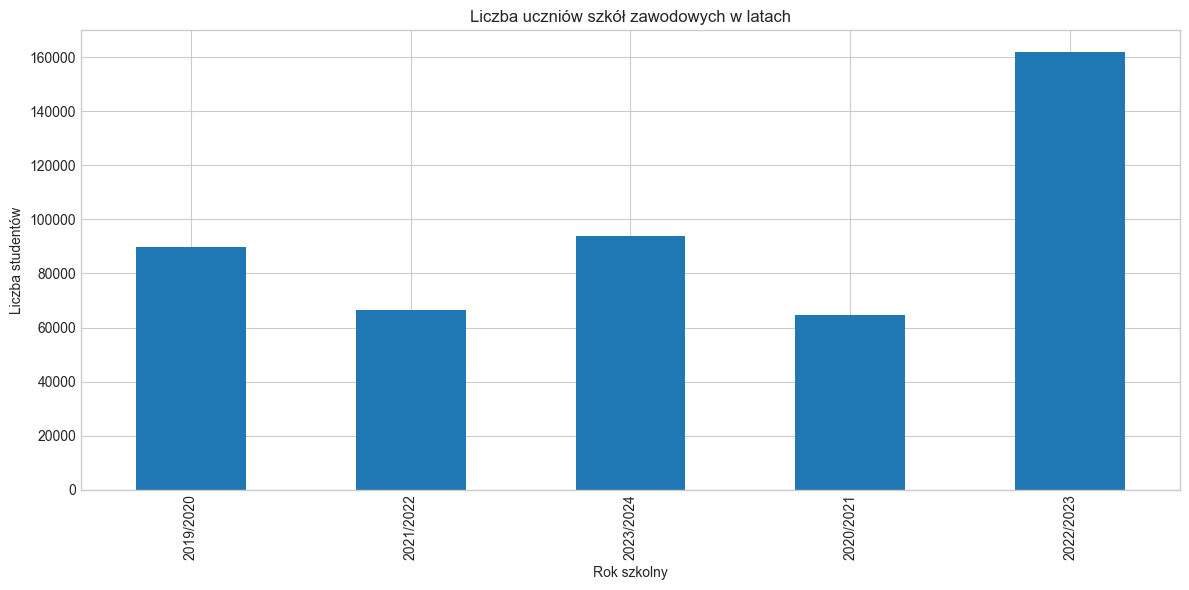

In [ ]:

plt.figure(figsize=(12, 6))
students_by_year.plot(kind="bar")
plt.title("Liczba uczniów szkół zawodowych w latach")
plt.xlabel("Rok szkolny")
plt.ylabel("Liczba studentów")
plt.tight_layout()
plt.savefig("students_by_year.png")

if "region_trends" in locals():
    # Pivot for region trends visualization
    # Pivot dla wizualizacji trendów regionalnych
    pivot_regions = region_trends.pivot(
        index="rok_szkolny", columns=region_col, values="count"
    )

    # Ustaw lepszy styl wykresu
    plt.style.use('seaborn-v0_8-whitegrid')

    # Utwórz większy wykres z lepszymi proporcjami
    plt.figure(figsize=(14, 10))

    # Ustaw szerszą paletę kolorów dla lepszego rozróżnienia regionów
    import matplotlib.colors as mcolors
    colors = list(mcolors.TABLEAU_COLORS.values()) + list(mcolors.CSS4_COLORS.values())[:10]

    # Utwórz wykres z lepszymi parametrami
    ax = pivot_regions.plot(
        marker='o',  # Dodaj znaczniki punktów
        markersize=6,  # Rozmiar znaczników
        linewidth=2.5,  # Grubsza linia
        color=colors,  # Lepsza paleta kolorów
        alpha=0.8,  # Lekka przezroczystość
        ax=plt.gca()  # Użyj bieżących osi
    )

    # Popraw tytuł i etykiety osi
    plt.title("Trend na szkoły zawodowe w danych województwach", fontsize=16, pad=20)
    plt.xlabel("Rok szkolny", fontsize=12, labelpad=10)
    plt.ylabel("Liczba studentów", fontsize=12, labelpad=10)

    # Popraw oś X dla lepszej czytelności
    plt.xticks(fontsize=10, rotation=45)
    plt.yticks(fontsize=10)

    # Utwórz lepszą legendę z prawej strony wykresu
    plt.legend(
        title="Województwo", 
        title_fontsize=12,
        fontsize=10,
        loc="center left", 
        bbox_to_anchor=(1.02, 0.5),  # Przesuń legendę na prawo od wykresu
        frameon=True,  # Dodaj ramkę
        facecolor='white',  # Białe tło
        edgecolor='lightgray'  # Jasno-szara ramka
    )

    # Dodaj siatkę dla lepszej czytelności
    plt.grid(True, linestyle='--', alpha=0.7)

    # Popraw zakres osi Y, zaczynając od 0
    y_max = pivot_regions.max().max() * 1.1  # 10% więcej niż maksimum
    plt.ylim(0, y_max)

    # Dodaj lekkie cieniowanie pod liniami (opcjonalnie)
    if len(pivot_regions.columns) <= 5:  # Tylko jeśli mamy niewiele regionów
        for column, color in zip(pivot_regions.columns, colors[:len(pivot_regions.columns)]):
            plt.fill_between(
                pivot_regions.index, 
                pivot_regions[column], 
                alpha=0.1, 
                color=color
            )

    # Dodaj ramkę
    plt.tight_layout()

    # Zapisz wykres w wysokiej rozdzielczości
    plt.savefig("region_trends.png", dpi=300, bbox_inches='tight')

    # Wyświetl wykres
    plt.show()

    # Close the client
    client.close()

else:
    print("No valid data found in the files.")